Plot the bounding boxes for `calexps` (`ccdVisits`) that overlap a given coordinate.

In [1]:
from lsst.rsp import get_tap_service, retrieve_query
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord

In [2]:
service = get_tap_service("tap")

Assume user passes `coord` as an `astropy.SkyCoord` and `mjd_range` as a tuple.

Use a coordinate near the center of DP0.2 for this example.

In [3]:
coord = SkyCoord(62.0, -37.0, frame='icrs', unit='deg')
mjd_range = (60250, 60300)

In [4]:
str_ra = str(coord.ra.deg)
str_dec = str(coord.dec.deg)
str_mjd1 = str(mjd_range[0])
str_mjd2 = str(mjd_range[1])

In [5]:
query = "SELECT ra, decl, band, ccdVisitId, expMidptMJD, " + \
        "llcra, llcdec, ulcra, ulcdec, urcra, urcdec, lrcra, lrcdec " + \
        "FROM dp02_dc2_catalogs.CcdVisit " + \
        "WHERE CONTAINS(POINT('ICRS', " + str_ra + ", " + str_dec + "), " + \
        "POLYGON('ICRS', llcra, llcdec, ulcra, ulcdec, urcra, urcdec, lrcra, lrcdec)) = 1 " + \
        "AND expMidptMJD >= " + str_mjd1 + " AND expMidptMJD <= " + str_mjd2

In [6]:
# print(query)

In [7]:
job = service.submit_job(query)

In [8]:
job.run()
job.wait(phases=['COMPLETED', 'ERROR'])
print('Job phase is', job.phase)

Job phase is COMPLETED


In [9]:
results = job.fetch_result().to_table()

In [10]:
# results

It would be better to make this an interactive plot with a hover tool that shows the `ccdVisitId` and `expMidptMJD`,
but here is a `matplotlib` version.

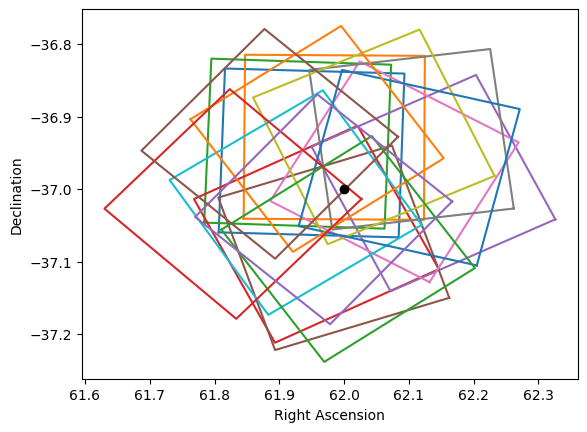

In [11]:
for x in range(len(results)):
    xvals = [results['llcra'][x], results['ulcra'][x], results['urcra'][x], results['lrcra'][x], results['llcra'][x]]
    yvals = [results['llcdec'][x], results['ulcdec'][x], results['urcdec'][x], results['lrcdec'][x], results['llcdec'][x]]
    plt.plot(xvals, yvals, ls='solid')
    del xvals, yvals

plt.plot(62, -37, 'o', color='black')
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.show()